<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#	1.3 Perform necessary preprocessing steps
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
data = load_diabetes(as_frame=True)

# Convert to DataFrame
df = data.frame.copy()

# Add target column
df['target'] = data.target

# Handling Missing Values
df.isnull().sum()


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


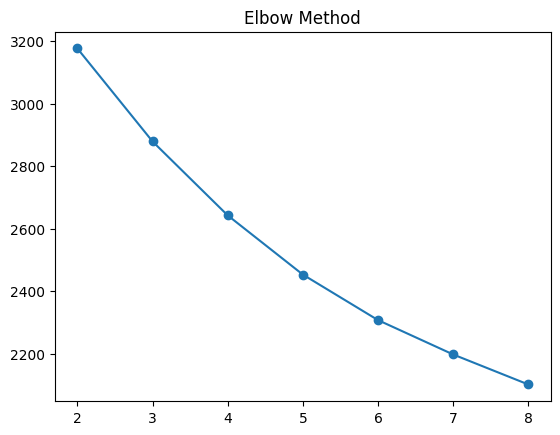

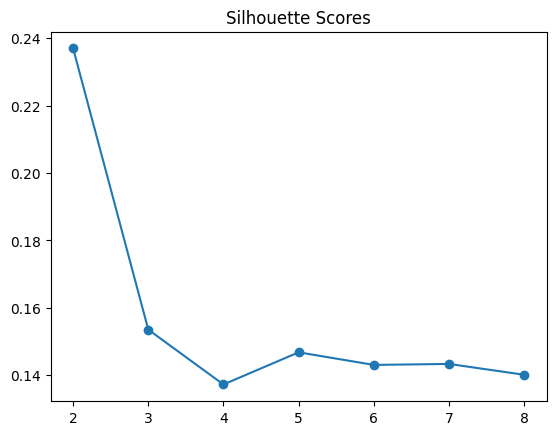

In [6]:
# 2. Clustering- K-Means Clustering and Hierarchical
# Optimal Number of Clusters- Elbow Method, Silhouette Score

# Load dataset
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes(as_frame=True)
df = data.frame.copy()
df["target"] = data.target

# Defining the features
X = df.drop(columns=["target"])
y = df["target"]

# Scaling it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding numbers of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
Ks = range(2, 9)

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plotting elbow and silhouette
plt.plot(Ks, inertias, '-o')
plt.title("Elbow Method")
plt.show()

plt.plot(Ks, sil_scores, '-o')
plt.title("Silhouette Scores")
plt.show()


In [7]:
# K-Means Clustering
# Attempting to split the dataset to K clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_scaled)

km_silhouette = silhouette_score(X_scaled, labels_km)
print("K-Means Silhouette Score:", km_silhouette)



K-Means Silhouette Score: 0.153473385862699


In [9]:
# Hierarchical Clustering
# This clustering builds nested clusters by merging samples
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_scaled)

agg_silhouette = silhouette_score(X_scaled, labels_agg)
print("Clustering Silhouette Score:", agg_silhouette)


Clustering Silhouette Score: 0.12496473908632372


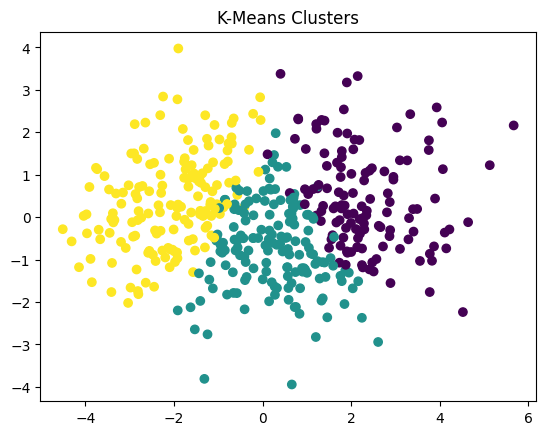

In [11]:
# Visualization of Clusters
# Using 2D for projecting the Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)

plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labels_km)
plt.title("K-Means Clusters")
plt.show()


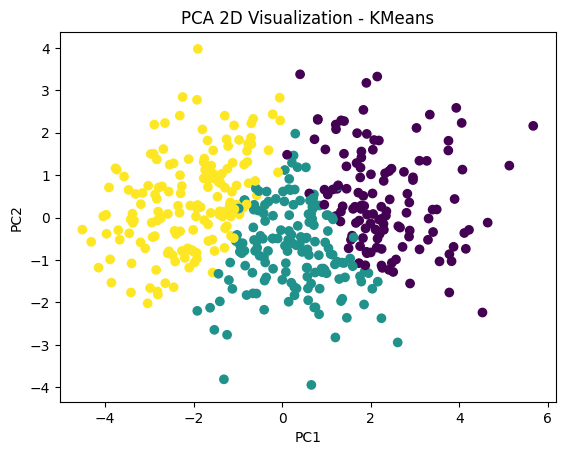

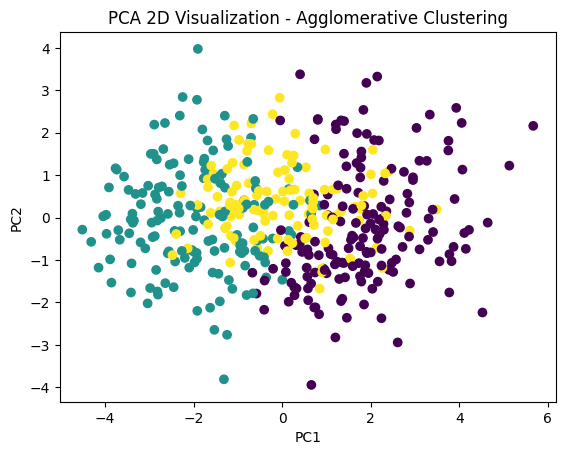

In [12]:
#	3. Dimensionality Reduction
# PCA Technique
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA of 2 components
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)

# Visualize PCA components with KMeans labels
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels_km)
plt.title("PCA 2D Visualization - KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Visualize PCA components with Agglomerative labels
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels_agg)
plt.title("PCA 2D Visualization - Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [16]:
# 4. Model Evaluation- Silhouette Score, DBI
from sklearn.metrics import silhouette_score, davies_bouldin_score

# SILHOUETTE SCORE
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", sil_score)

# DavisBI INDEX
db_index = davies_bouldin_score(X_scaled, labels)
print("DBI-Index:", db_index)

Silhouette Score: 0.14008399678012412
DBI-Index: 1.7117754372460734


In [18]:
# 5. Deployment and Monitoring
# Saving the Model
import joblib

# Save the scaler and clustering model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")

print("Model and scaler has now been saved successfully!")

Model and scaler has now been saved successfully!


In [32]:
# Loading the Model for production purposes
import joblib

# Loading saved model and scaler
scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")

# Predicting the Cluster for New coming Data
import numpy as np

# Example new sample
new_data = np.array([[5.1, 3.2, 1.5, 0.3, 2.5, 1.8, 3.0, 2.2, 1.9, 2.7]])

# Scale new data
new_scaled = scaler.transform(new_data)

# Predict cluster
cluster_label = kmeans.predict(new_scaled)

print('Predicted Cluster:', cluster_label)



Predicted Cluster: [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
# Deployment Option
# Flask API a Simple Web Service
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")

@app.route('/predict', methods=['POST'])
def predict_cluster():
    data = request.json['features']  # list of numbers
    data = np.array([data])
    scaled = scaler.transform(data)
    cluster = kmeans.predict(scaled)[0]
    return jsonify({"cluster": int(cluster)})

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [34]:
# Data Drift Monitoring
import numpy as np

# Compare mean of training data vs new data
train_mean = X_scaled.mean(axis=0)
new_mean = new_scaled.mean(axis=0)

drift = np.abs(train_mean - new_mean)
print("Data Drift:", drift)

Data Drift: [107.22135981  67.27614733  31.53569406   6.30713881  52.5594901
  37.84283287  63.07138812  46.25235129  39.94521248  56.76424931]


In [35]:
# Cluster Stability Monitoring
# Tracking to see how many samples fall in each cluster
import collections

cluster_counts = collections.Counter(kmeans.predict(X_scaled))
print("Cluster Distribution:", cluster_counts)


Cluster Distribution: Counter({np.int32(1): 159, np.int32(2): 158, np.int32(0): 125})
